In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian Network
model = gum.BayesNet('HiddenMarkovModel')

# Define the states
s1 = model.add(gum.LabelizedVariable('S1', 'State 1', 2))
s2 = model.add(gum.LabelizedVariable('S2', 'State 2', 2))

# Define the emission probabilities
obs1_prob = gum.Potential().fillWith([0.8, 0.2])  # Emission probabilities for State 1
obs2_prob = gum.Potential().fillWith([0.5, 0.5])  # Emission probabilities for State 2
obs3_prob = gum.Potential().fillWith([0.3, 0.7])  # Emission probabilities for State 3

# Add emission probabilities to states
model.addArc(s1, s1)
model.addArc(s1, s2)
model.addArc(s2, s1)
model.addArc(s2, s2)

model.cpt(s1)[{'S1': 0}] = [0.7, 0.3]
model.cpt(s1)[{'S1': 1}] = [0.4, 0.6]
model.cpt(s2)[{'S2': 0}] = [0.7, 0.3]
model.cpt(s2)[{'S2': 1}] = [0.4, 0.6]

# Plot the state diagram
gnb.showBN(model)

# Compute the probability of a given output sequence
output_sequence = {'obs1': 0, 'obs2': 1, 'obs3': 0}  # Observation evidence
posterior = gum.LazyPropagation(model).posterior(s1)
probability = posterior[output_sequence]
print("Probability of Output Sequence:", probability)


SizeError: [pyAgrum] incorrect size: Size do not match in populate

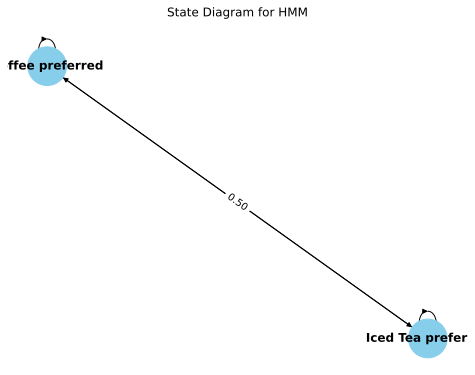

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define transition probabilities between states
transition_matrix = np.array([[0.7, 0.3],  # Transition probabilities from 'Coffee preferred' state
                               [0.5, 0.5]])  # Transition probabilities from 'Iced Tea preferred' state

# Define emission observation probabilities
emission_probs = {'Coffee preferred': {'Coffee': 0.6, 'Iced Tea': 0.1, 'Lemonade': 0.3},
                  'Iced Tea preferred': {'Coffee': 0.1, 'Iced Tea': 0.7, 'Lemonade': 0.2}}

# Define states and emission observations
states = ['Coffee preferred', 'Iced Tea preferred']
observations = ['Coffee', 'Iced Tea', 'Lemonade']

# Create directed graph
G = nx.DiGraph()
G.add_nodes_from(states)

# Add edges with transition probabilities as labels
for i, source in enumerate(states):
    for j, target in enumerate(states):
        transition_prob = transition_matrix[i, j]
        G.add_edge(source, target, label=f"{transition_prob:.2f}")  # Format probability to two decimal places

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show plot
plt.title("State Diagram for HMM")
plt.show()
